# Практична робота 4 

## Глибокий аналіз і візуалізація даних 

In [58]:
import pandas as pd
df = pd.read_csv("C:/Users/faika/Downloads/museum_visitors.csv", encoding="latin1")

In [5]:
df.head(5)

,Date,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
0,2014-01-01,24778,4486,1581,6602
1,2014-02-01,18976,4172,1785,5029
2,2014-03-01,25231,7082,3229,8129
3,2014-04-01,26989,6756,2129,2824
4,2014-05-01,36883,10858,3676,10694


In [9]:
df.shape

(59, 5)

In [10]:
df.dtypes

Date                                    object
Avila Adobe                              int64
Firehouse Museum                         int64
Chinese American Museum                  int64
America Tropical Interpretive Center     int64
dtype: object

In [11]:
df.isnull().sum()

Date                                    0
Avila Adobe                             0
Firehouse Museum                        0
Chinese American Museum                 0
America Tropical Interpretive Center    0
dtype: int64

In [13]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
dtype: bool

In [59]:
df['year'] = pd.to_datetime(df['Date']).dt.year
unique_years = df['year'].unique()
unique_years

array([2014, 2015, 2016, 2017, 2018], dtype=int64)

In [60]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns

Index(['date', 'avila_adobe', 'firehouse_museum', 'chinese_american_museum',
       'america_tropical_interpretive_center', 'year'],
      dtype='object')

In [61]:
df[["avila_adobe", "firehouse_museum", "chinese_american_museum","avila_adobe","america_tropical_interpretive_center"]].mean()

avila_adobe                             24061.661017
firehouse_museum                         6472.830508
chinese_american_museum                  2721.254237
avila_adobe                             24061.661017
america_tropical_interpretive_center     7107.016949
dtype: float64

In [62]:
df_2018 = df[df['date'].str.contains('2018')]
min_2018 = df_2018[["avila_adobe", "firehouse_museum", "chinese_american_museum","avila_adobe","america_tropical_interpretive_center"]].min()
max_2018 = df_2018[["avila_adobe", "firehouse_museum", "chinese_american_museum","avila_adobe","america_tropical_interpretive_center"]].max()
print("Min:\n",min_2018)
print("Max:\n",max_2018)

Min:
 avila_adobe                             14718
firehouse_museum                         3306
chinese_american_museum                  2146
avila_adobe                             14718
america_tropical_interpretive_center     3180
dtype: int64
Max:
 avila_adobe                             25173
firehouse_museum                         8013
chinese_american_museum                  4960
avila_adobe                             25173
america_tropical_interpretive_center     5837
dtype: int64


In [65]:
df_2015 = df[df['date'].str.contains('2015')].copy()
df_2015['year'] = pd.to_datetime(df_2015['date']).dt.year
df_2015['month'] = pd.to_datetime(df_2015['date']).dt.month
df_2015 = df_2015.drop(['date', 'year'], axis=1)
monthly_visitors = df_2015.groupby('month').sum()
max_month = monthly_total_visitors.sum(axis=1).idxmax()
min_month = monthly_total_visitors.sum(axis=1).idxmin()
months = ["січень", "лютий", "березень", "квітень", "травень", "червень", "липень", "серпень", "вересень", "жовтень", "листопад", "грудень"]
print(f"Місяць з найвищою кількістю відвідувачів у 2015 році: {months[max_month-1]}")
print(f"Місяць з найнижчою кількістю відвідувачів у 2015 році: {months[min_month-1]}")

Місяць з найвищою кількістю відвідувачів у 2015 році: травень
Місяць з найнижчою кількістю відвідувачів у 2015 році: лютий


In [66]:
df['date'] = pd.to_datetime(df['date'])
summer_start = pd.to_datetime('2018-06-01')
summer_end = pd.to_datetime('2018-08-31')
winter_start = pd.to_datetime('2018-12-01')
winter_end = pd.to_datetime('2019-02-28')
summer_2018 = df[(df['date'] >= summer_start) & (df['date'] <= summer_end)]
winter_2018 = df[(df['date'] >= winter_start) & (df['date'] <= winter_end)]
print("Літом:",summer_2018['avila_adobe'].sum())
print("Зимою:",winter_2018['avila_adobe'].sum())

Літом: 66122
Зимою: 0


In [102]:
df_2016 = df[df['date'].dt.year == 2016]

museums = ["avila_adobe", "firehouse_museum", "chinese_american_museum", "america_tropical_interpretive_center"]

df_2016['day_of_year'] = df_2016['date'].dt.dayofyear
correlation_matrix = df_2016[museums + ['day_of_year']].corr()
correlation_matrix

C:\Users\faika\AppData\Local\Temp/ipykernel_7576/1797503104.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2016['day_of_year'] = df_2016['date'].dt.dayofyear.copy()


,avila_adobe,firehouse_museum,chinese_american_museum,america_tropical_interpretive_center,day_of_year
avila_adobe,1.000000,0.737200,0.089054,0.436561,0.060350
firehouse_museum,0.737200,1.000000,0.553935,0.247389,-0.201650
chinese_american_museum,0.089054,0.553935,1.000000,0.443800,-0.415031
america_tropical_interpretive_center,0.436561,0.247389,0.443800,1.000000,-0.228172
day_of_year,0.060350,-0.201650,-0.415031,-0.228172,1.000000


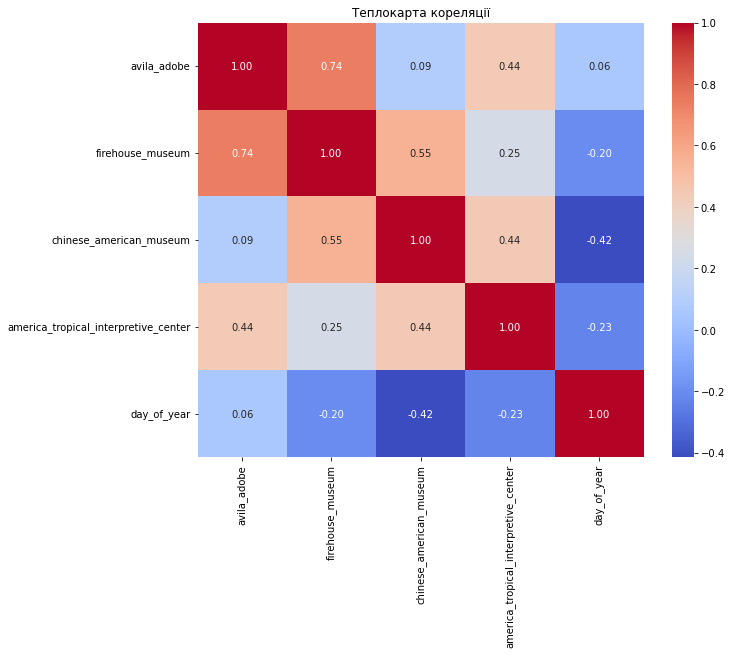

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Теплокарта кореляції")
plt.show()

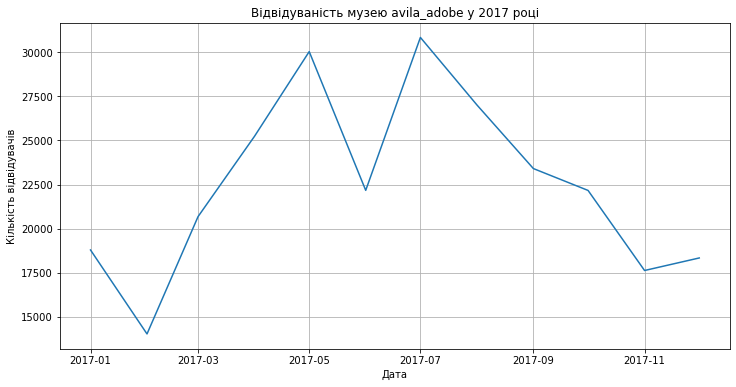

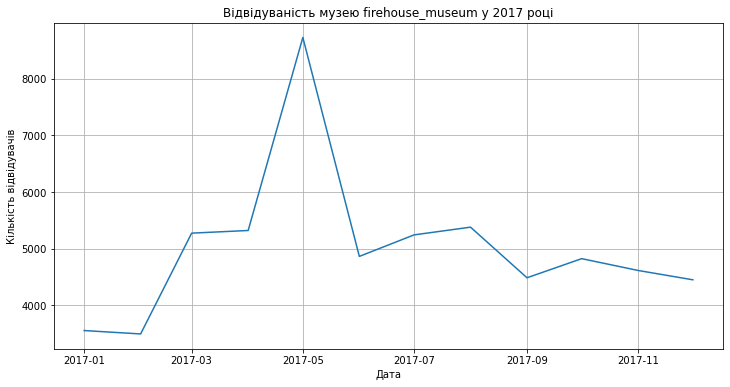

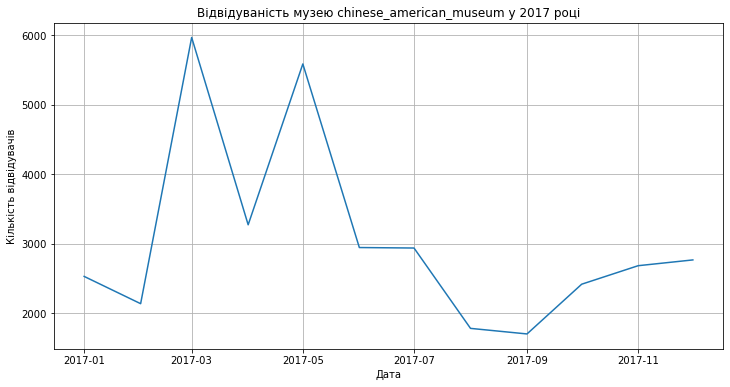

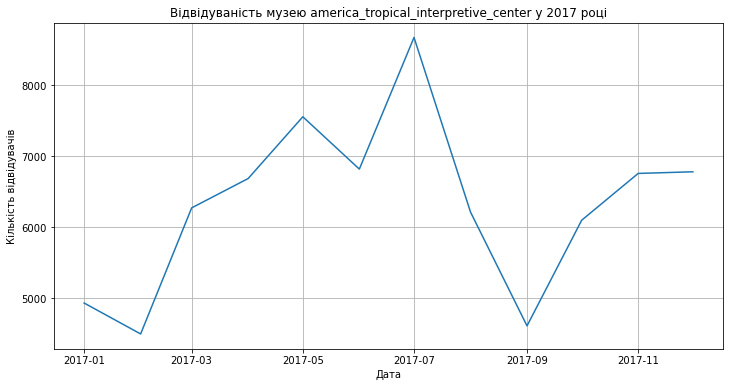

In [121]:
df_2017 = df[df['date'].dt.year == 2017]
for museum in museums:
    museum_data = df_2017[['date', museum]]
    museum_data = museum_data.set_index('date')

    plt.figure(figsize=(12, 6))
    plt.plot(museum_data.index, museum_data[museum])
    plt.title(f"Відвідуваність музею {museum} у 2017 році")
    plt.xlabel("Дата")
    plt.ylabel("Кількість відвідувачів")
    plt.grid()
    plt.show()

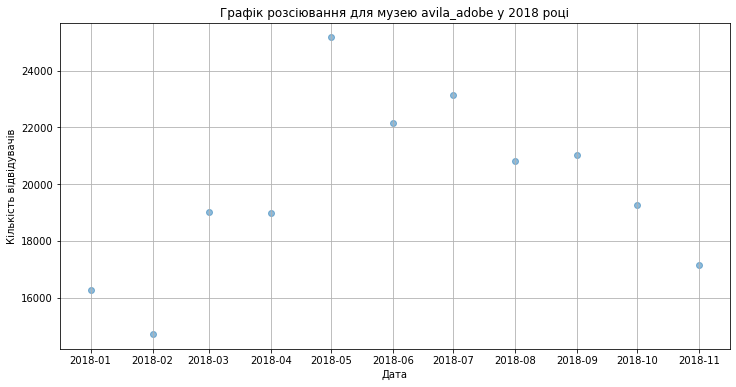

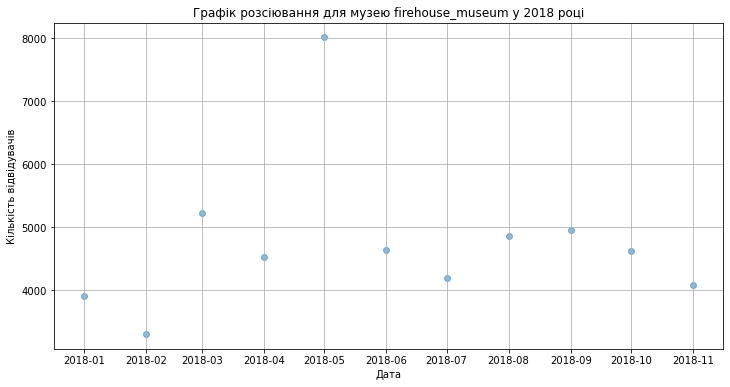

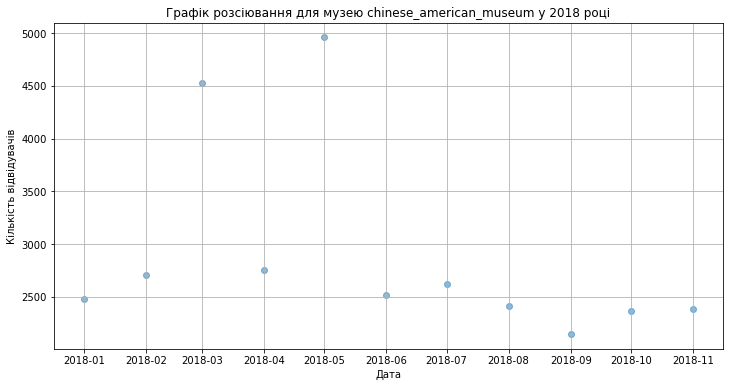

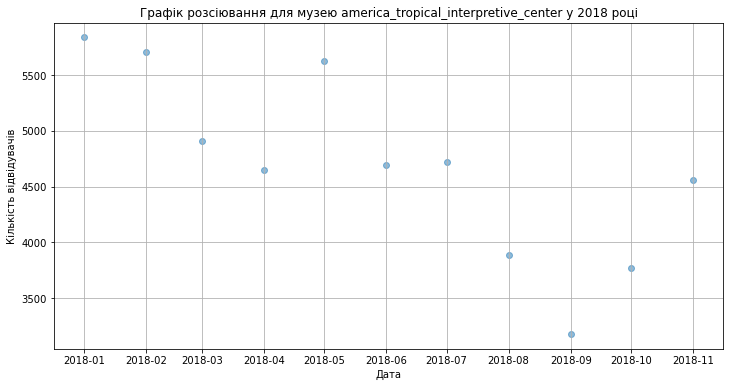

In [129]:
df_2018 = df[df['date'].dt.year == 2018]
for museum in museums:
    museum_data = df_2018[['date', museum]]
    museum_data = museum_data.set_index('date')

    plt.figure(figsize=(12, 6))
    plt.scatter(museum_data.index, museum_data[museum], alpha=0.5)
    plt.title(f"Графік розсіювання для музею {museum} у 2018 році")
    plt.xlabel("Дата")
    plt.ylabel("Кількість відвідувачів")
    plt.grid()
    plt.show()

# Не зрозумів по кольорам, так-як якщо вибрати один колір на графік то всі значнення будуть зливатися, відповідно він не буде інформативним

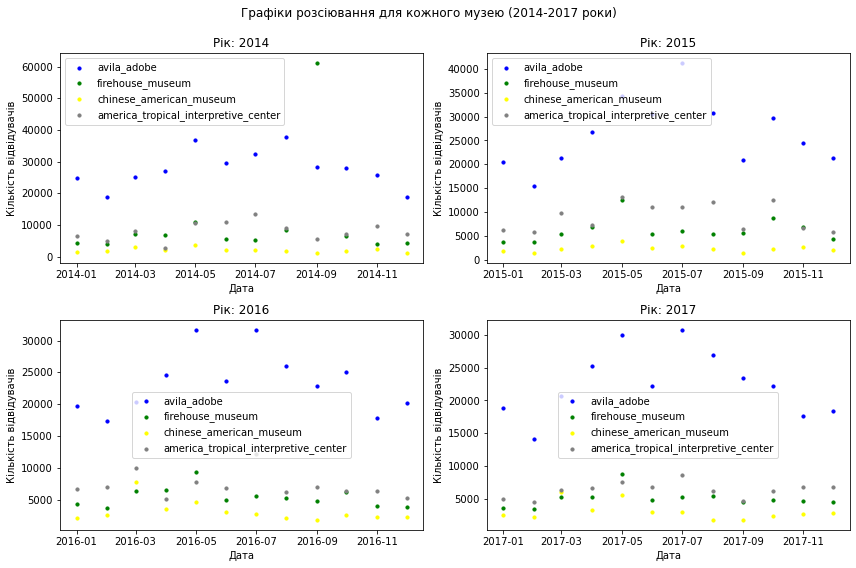

In [137]:
years = [2014, 2015, 2016, 2017]
dfs = {year: df[df['date'].dt.year == year] for year in years}
colors = ['blue', 'green', 'yellow', 'gray']
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Графіки розсіювання для кожного музею")

for i, year in enumerate(range(2014, 2018)):
    for j, museum in enumerate(museums):
        ax = axs[i // 2, i % 2]
        museum_data = df[df['date'].dt.year == year]
        ax.scatter(museum_data['date'], museum_data[museum], color=colors[j], s=10, label=f"{museum}")
        ax.set_title(f"Рік: {year}")
        ax.set_xlabel("Дата")
        ax.set_ylabel("Кількість відвідувачів")
        ax.legend()

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()